In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
def geometric_brownian_motion(S0, mu, sigma, T, dt, n_simulations):
    """
    Generate price paths using Geometric Brownian Motion (GBM)
        
    Parameters:
    - S0: Initial price
    - mu: Drift (expected return)
    - sigma: Volatility
    - T: Time horizon (years)
    - dt: Time step
    - n_simulations: Number of simulation paths
        
    Returns:
    - Array of final prices for each simulation
    """
    n_steps = int(T / dt)
    dt_sqrt = np.sqrt(dt)
        
    # Generate random shocks
    random_shocks = np.random.normal(0, 1, (n_simulations, n_steps))
        
    # Initialize price array
    prices = np.zeros((n_simulations, n_steps + 1))
    prices[:, 0] = S0
        
    # Calculate price evolution
    for t in range(1, n_steps + 1):
        prices[:, t] = prices[:, t-1] * np.exp(
            (mu - 0.5 * sigma**2) * dt + sigma * dt_sqrt * random_shocks[:, t-1]
        )
        
    return prices  # Return final prices

In [9]:
paths = geometric_brownian_motion(100, 0.05, 0.2, 1, 1/50, 10)

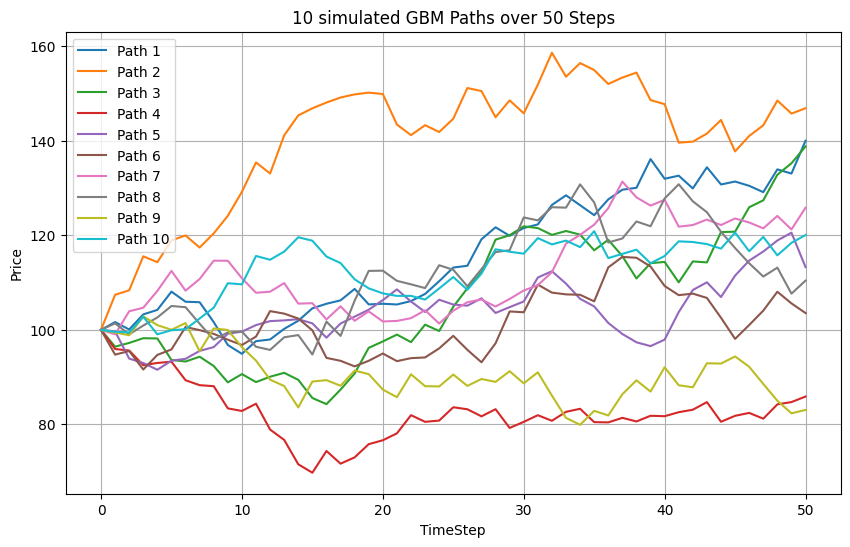

In [10]:
plt.figure(figsize=(10,6))
for i in range(10):
    plt.plot(paths[i], label=f"Path {i+1}")
plt.title("10 simulated GBM Paths over 50 Steps")
plt.xlabel("TimeStep")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()